In [6]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("white")

In [7]:
archetype = "Southern"
scenario_df = pd.read_csv("../scenario_master_list.csv")
scenario_df = scenario_df[scenario_df["archetype"]==archetype].reset_index(drop=True)

In [9]:
df_iver = pd.read_csv("endpoints_4d440af1-09a3-eb11-a2ce-c4346bcb1550.csv")

In [16]:
agg_type = "mean"

df = pd.read_csv("endpoints_a71e7b31-559d-eb11-a2ce-c4346bcb1550.csv")
df_baseline = df[df["scenario_number"]==30].groupby("burnin_approx_pfpr2_10").agg(agg_type).reset_index()
df_iver_with_baseline = pd.merge(df_iver, df_baseline, on="burnin_approx_pfpr2_10", suffixes=("","_BASELINE"))
df_iver_with_baseline["fraction_reduction_incidence"] = (df_iver_with_baseline["clinical_incidence_all_BASELINE"]-df_iver_with_baseline["clinical_incidence_all"])/df_iver_with_baseline["clinical_incidence_all_BASELINE"]

df_agg = df_iver.groupby(["burnin_approx_pfpr2_10", "scenario_number"]).agg(agg_type).reset_index().merge(scenario_df, on="scenario_number", suffixes=("","_DUPLICATED"))
df_agg["out_of_school_rate"] = np.round(df_agg["out_of_school_rate"],2)

df_agg_w_baseline = df_agg.merge(df_baseline, on="burnin_approx_pfpr2_10", suffixes=["","_BASELINE"], how="left")
    

Text(0.5, 1.0, 'Southern')

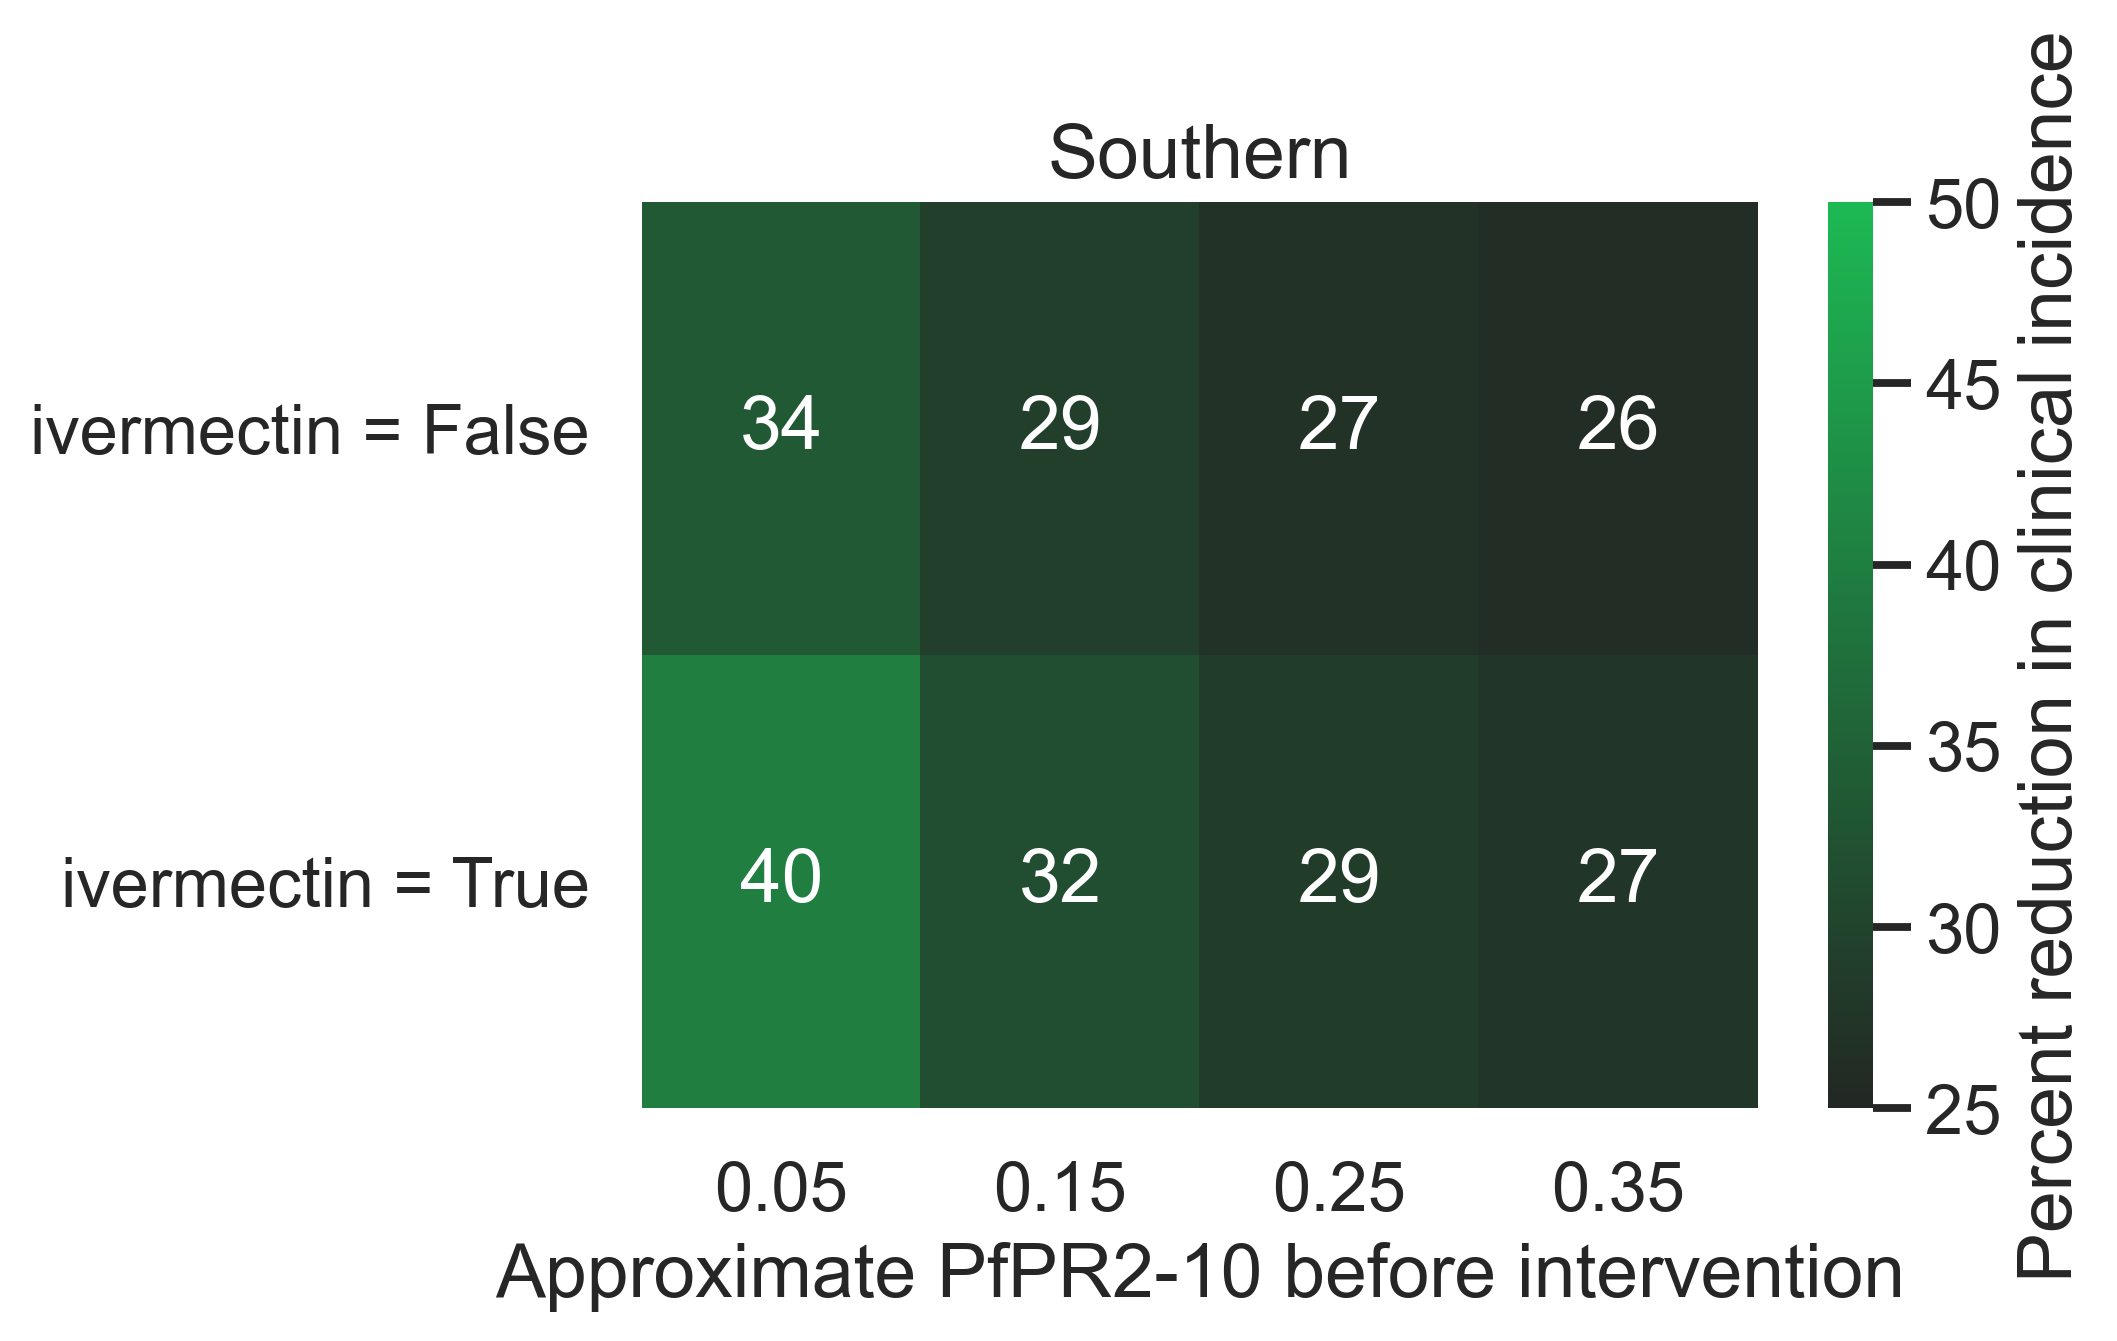

In [54]:
plt.figure(dpi=300)
archetype="Southern"
foo = df_agg_w_baseline.copy(deep=True)
bar = foo[np.in1d(foo["scenario_number"], [13,34])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = "ivermectin = " + bar["ivermectin"].astype("string")

# bar['intervention_name'] = pd.Categorical(bar['intervention_name'], intervention_name_list[archetype])
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=25, vmax=50, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)

In [33]:
def get_agg_df_w_baseline(archetype, agg_type="mean"):
    def _add_drug_length(df):
        df["drug_length"] = -1
        df.loc[df["drug_type"]=="DP", "drug_length"] = 28
        df.loc[np.logical_or(df["drug_type"]=="ASAQ", df["drug_type"]=="SPAQ"), "drug_length"] = 14
        
    scenario_df = pd.read_csv("../scenario_master_list.csv")
    scenario_df = scenario_df[scenario_df["archetype"]==archetype].reset_index(drop=True)

    if archetype == "Sahel":
#         df = pd.read_csv("endpoints_bdc41c37-b09c-eb11-a2ce-c4346bcb1550.csv")
#         df.drop(df[np.in1d(df['scenario_number'], [35, 36])].index, inplace = True)
#         df2 = pd.read_csv("endpoints_c1c725ad-e49c-eb11-a2ce-c4346bcb1550.csv") # has corrected scenarios 35 and 36
#         df = pd.concat([df,df2])
#         df = pd.read_csv("endpoints_1e270e7a-559d-eb11-a2ce-c4346bcb1550.csv")
        df = pd.read_csv("endpoints_312b5201-609d-eb11-a2ce-c4346bcb1550.csv")
        df2 = pd.read_csv("endpoints_44bed067-43a2-eb11-a2ce-c4346bcb1550.csv") # SMC with DP
        df = pd.concat([df,df2])
    elif archetype == "Southern":
#         df = pd.read_csv("endpoints_f70751f3-2d98-eb11-a2ce-c4346bcb1550.csv") 
#         df2 = pd.read_csv("endpoints_b925ffe3-af9c-eb11-a2ce-c4346bcb1550.csv")
#         df = pd.concat([df, df2])
        df = pd.read_csv("endpoints_a71e7b31-559d-eb11-a2ce-c4346bcb1550.csv")
        df2 = pd.read_csv("endpoints_b7cd3df7-24a2-eb11-a2ce-c4346bcb1550.csv") #extra ITN scenario)
        df = pd.concat([df,df2])
    

    # df cleaning
    df["out_of_school_rate"] = np.round(df["out_of_school_rate"],2)
    _add_drug_length(df)
    df.fillna({"smc_on": False,
                "smc_age_range": "default",
                "ivermectin": False,
                "primaquine": False}, inplace=True)
    
    df_baseline = df[df["scenario_number"]==30].groupby("burnin_approx_pfpr2_10").agg(agg_type).reset_index()
#     df_allout = df[df["scenario_number"]==27].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()

    df_agg = df.groupby(["burnin_approx_pfpr2_10", "scenario_number"]).agg(agg_type).reset_index().merge(scenario_df, on="scenario_number", suffixes=("","_DUPLICATED"))
    df_agg["out_of_school_rate"] = np.round(df_agg["out_of_school_rate"],2)

    df_agg_w_baseline = df_agg.merge(df_baseline, on="burnin_approx_pfpr2_10", suffixes=["","_BASELINE"], how="left")
    
    return df_agg_w_baseline

# Removing ivermectin from one of the IPT terms

In [40]:
df = pd.read_csv("endpoints_7f28d5b9-1fa3-eb11-a2ce-c4346bcb1550.csv")

In [42]:
x = df.groupby(["burnin_approx_pfpr2_10","term_skipped"]).agg("mean").reset_index()

print(x[["burnin_approx_pfpr2_10", "term_skipped","clinical_incidence_all"]])

    burnin_approx_pfpr2_10  term_skipped  clinical_incidence_all
0                     0.05             1                0.428191
1                     0.05             2                0.428254
2                     0.05             3                0.448814
3                     0.15             1                0.782297
4                     0.15             2                0.780004
5                     0.15             3                0.777713
6                     0.25             1                0.946073
7                     0.25             2                0.949554
8                     0.25             3                0.949779
9                     0.35             1                1.072183
10                    0.35             2                1.070936
11                    0.35             3                1.068506


Text(0.5, 0, 'Clinical incidence when skipping ivermectin for term X')

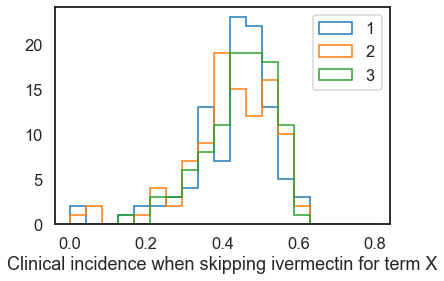

In [50]:
for i, sdf in df.groupby(["burnin_approx_pfpr2_10", "term_skipped"]):
    if i[0] == 0.05:
        plt.hist(sdf["clinical_incidence_all"], label=i[1], bins=np.linspace(0,0.8,20), histtype='step')

plt.legend()
plt.xlabel("Clinical incidence when skipping ivermectin for term X")

## Look again at iver distribution

In [56]:
df_iver = pd.read_csv("endpoints_4d440af1-09a3-eb11-a2ce-c4346bcb1550.csv")

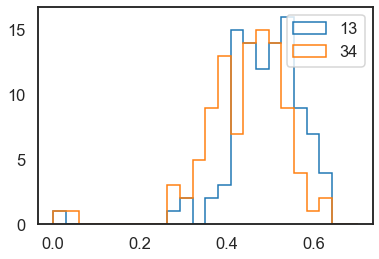

In [67]:
for i, sdf in df_iver.groupby(["scenario_number","burnin_approx_pfpr2_10"]):
    if i[1] == 0.05:
        plt.hist(sdf["clinical_incidence_all"], label=i[0],bins=np.linspace(0,0.7,25),histtype='step')
plt.legend()

In [60]:
df_iver.columns

Index(['pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all',
       'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'sim_id', 'archetype', 'burnin_approx_pfpr2_10', 'burnin_habitat_scale',
       'description', 'drug_type', 'exe_collection_id', 'hs_rate',
       'input_collection_id', 'interval', 'itn_coverage', 'ivermectin',
       'out_of_school_rate', 'primaquine', 'Run_Number', 'scenario_number',
       'screen_type', 'smc_age_range', 'smc_on', 'target_age_range',
       'within_school_coverage', 'Received_Treatment', 'Received_Test',
       'Received_Campaign_Drugs', 'Received_RCD_Drugs', 'Received_SMC',
       'Recei

(0.0, 0.5)

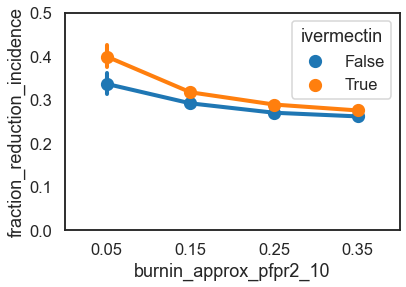

In [19]:
sns.pointplot(data=df_iver_with_baseline, x="burnin_approx_pfpr2_10", y="fraction_reduction_incidence", hue="ivermectin")
plt.ylim([0,0.5])

In [12]:
df_iver.columns

Index(['pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all',
       'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'sim_id', 'archetype', 'burnin_approx_pfpr2_10', 'burnin_habitat_scale',
       'description', 'drug_type', 'exe_collection_id', 'hs_rate',
       'input_collection_id', 'interval', 'itn_coverage', 'ivermectin',
       'out_of_school_rate', 'primaquine', 'Run_Number', 'scenario_number',
       'screen_type', 'smc_age_range', 'smc_on', 'target_age_range',
       'within_school_coverage', 'Received_Treatment', 'Received_Test',
       'Received_Campaign_Drugs', 'Received_RCD_Drugs', 'Received_SMC',
       'Recei

# Sahel

In [47]:
archetype = "Sahel"
scenario_df = pd.read_csv("../scenario_master_list.csv")
scenario_df = scenario_df[scenario_df["archetype"]==archetype].reset_index(drop=True)

df = pd.read_csv("endpoints_312b5201-609d-eb11-a2ce-c4346bcb1550.csv")
df_iver = pd.read_csv("endpoints_aee30595-83a3-eb11-a2ce-c4346bcb1550.csv")
df_iver.dropna(inplace=True)

agg_type = "mean"

df_baseline = df[df["scenario_number"]==30].groupby("burnin_approx_pfpr2_10").agg(agg_type).reset_index()
df_iver_with_baseline = pd.merge(df_iver, df_baseline, on="burnin_approx_pfpr2_10", suffixes=("","_BASELINE"))
df_iver_with_baseline["fraction_reduction_incidence"] = (df_iver_with_baseline["clinical_incidence_all_BASELINE"]-df_iver_with_baseline["clinical_incidence_all"])/df_iver_with_baseline["clinical_incidence_all_BASELINE"]

df_agg = df_iver.groupby(["burnin_approx_pfpr2_10", "scenario_number"]).agg(agg_type).reset_index().merge(scenario_df, on="scenario_number", suffixes=("","_DUPLICATED"))
df_agg["out_of_school_rate"] = np.round(df_agg["out_of_school_rate"],2)

df_agg_w_baseline = df_agg.merge(df_baseline, on="burnin_approx_pfpr2_10", suffixes=["","_BASELINE"], how="left")
    

Text(0.5, 1.0, 'Sahel')

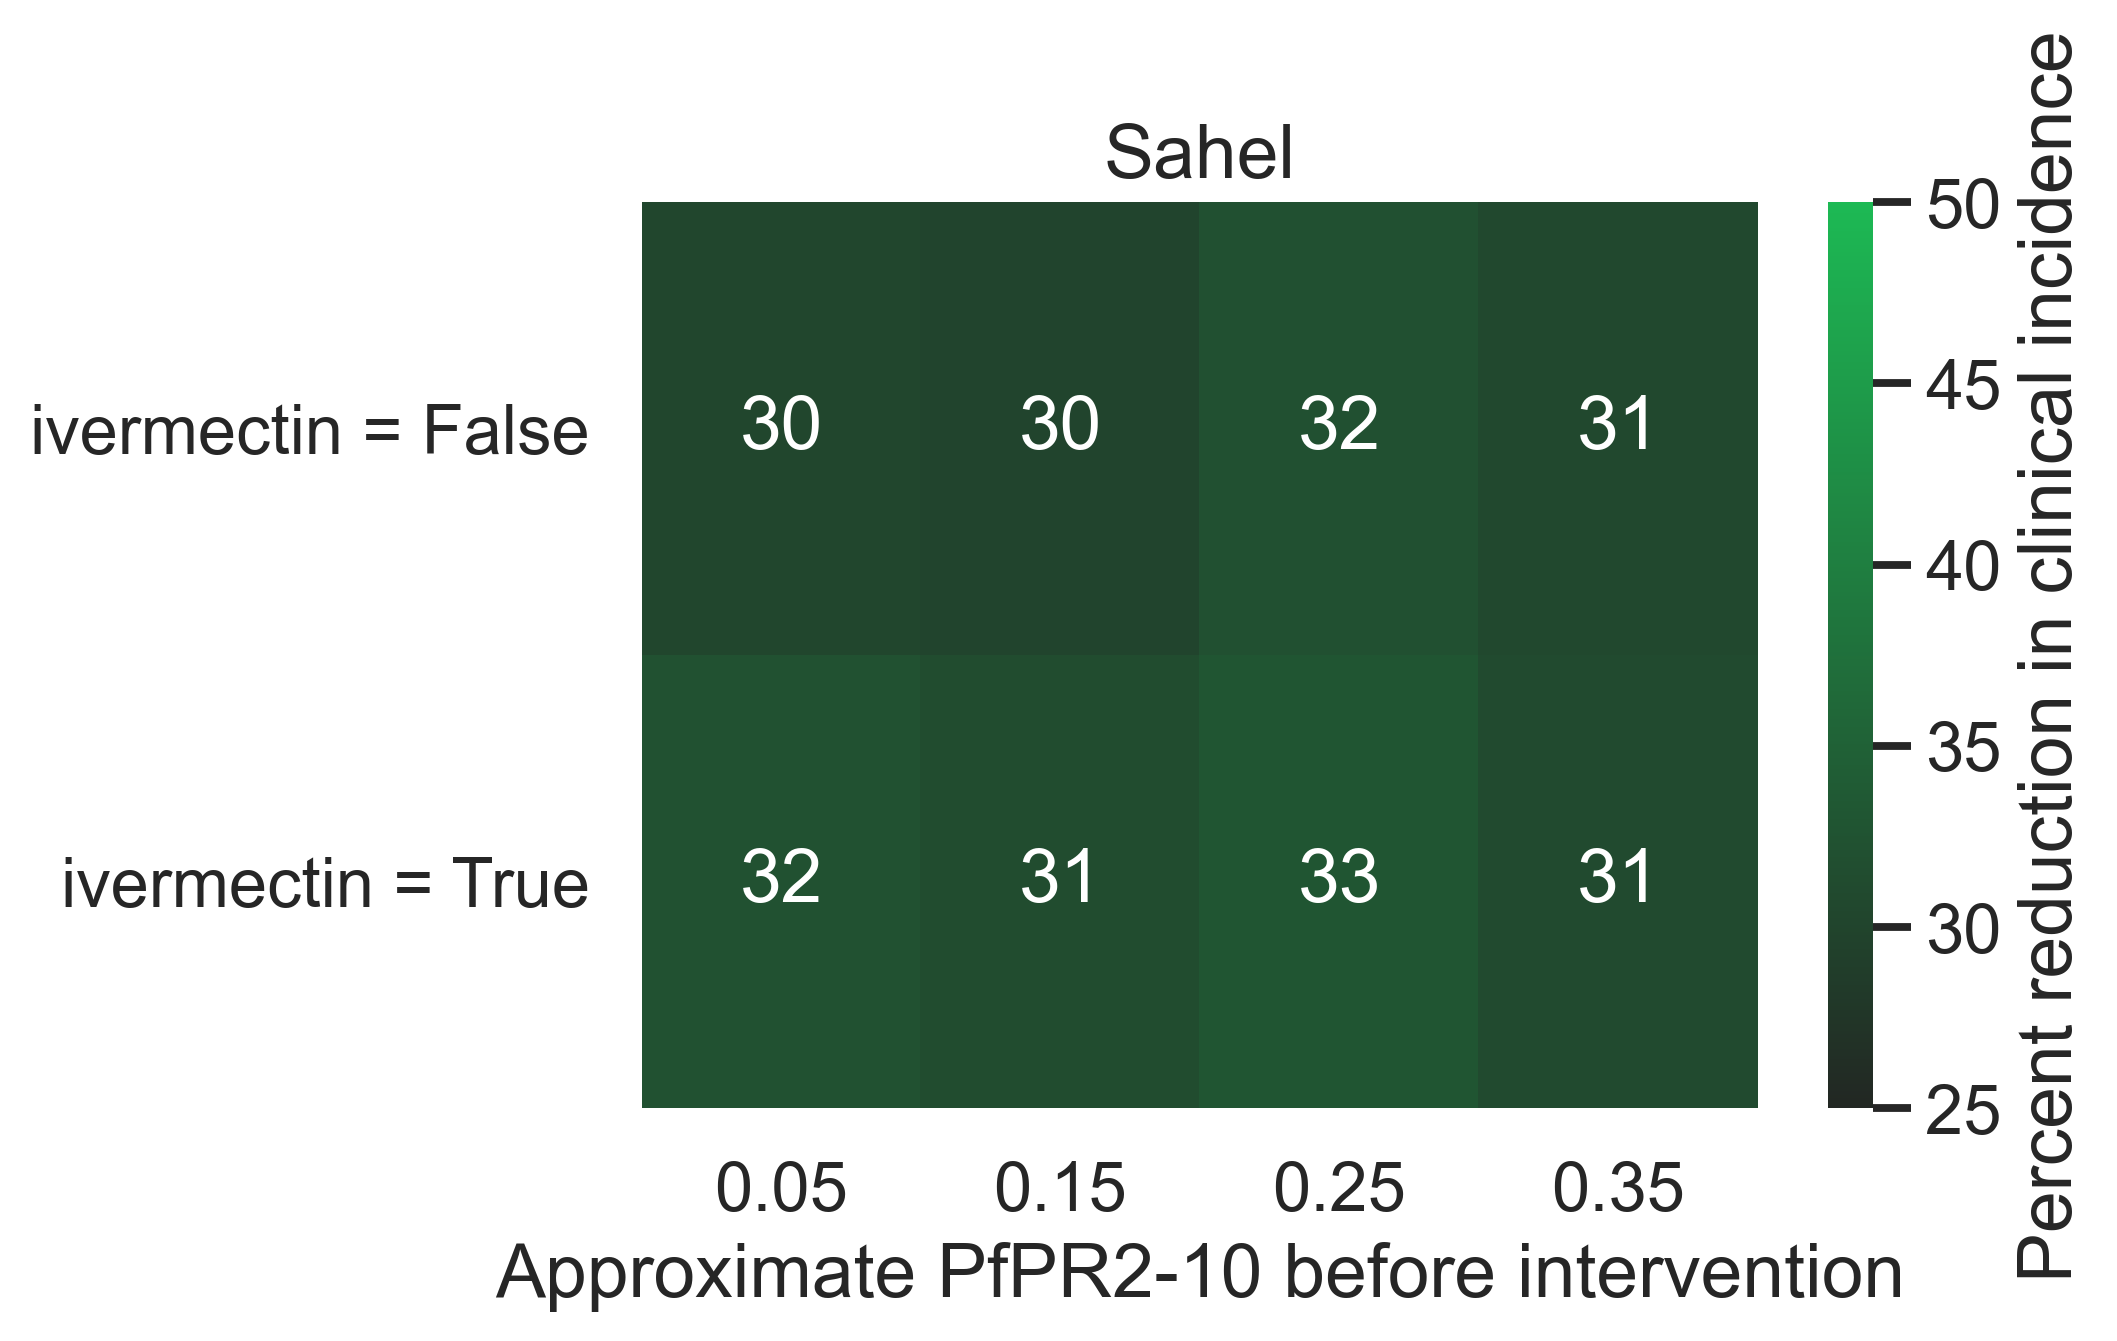

In [48]:
plt.figure(dpi=300)
foo = df_agg_w_baseline.copy(deep=True)
bar = foo[np.in1d(foo["scenario_number"], [13,44])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = "ivermectin = " + bar["ivermectin"].astype("string")

# bar['intervention_name'] = pd.Categorical(bar['intervention_name'], intervention_name_list[archetype])
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=25, vmax=50, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)

In [42]:
set(df_agg["scenario_number"])

{13}